# Linear Regression

library를 불러올 때는 import 라는 명령어를 통해 불러온다.  
해당 library를 통해 안에 있는 함수를 불러오고 싶을 땐 from ... import ... 를 사용한다

In [1]:
import numpy as np  # Array 다루는 Library
import pandas as pd  # Python의 Excel 같은 것 
import matplotlib.pyplot as plt  # 그래프이나 그림 보여주는 툴 

from sklearn import datasets, linear_model  # sklearn의 데이터셋과 Linear 모델
from sklearn.metrics import mean_squared_error, r2_score  # sklearn에서 제공 해주는 평가 함수

## 데이터 준비하기

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
df = pd.DataFrame(data = np.c_[diabetes['data'], diabetes['target']],
                  columns = diabetes['feature_names'] + ['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
len(df)

442

In [5]:
diabetes_X = np.array(df[['bmi']])  # 학습에 사용할 데이터셋 지정

diabetes_X_train = diabetes_X[:-20]  # 모의고사용과 수능용으로 문제지를 나누는 듯이
diabetes_X_test = diabetes_X[-20:]  # train과 test을 나누었다. 

diabetes_y_train = diabetes['target'][:-20]
diabetes_y_test = diabetes['target'][-20:]  # train dataset을 나눈만큼 정답지도 그 만큼 나눈다. 

# 모델 학습하기

In [6]:
regr = linear_model.LinearRegression()  # 모델 Linear Regression을 불러온다. 

regr.fit(X=diabetes_X_train, y=diabetes_y_train)  # 모델을 학습 시킨다. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
diabetes_y_pred = regr.predict(diabetes_X_test)  # 수능 시험을 보았을 때 그에 대한 결과를 담는다 

In [8]:
diabetes_y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

## 평가 점수 계산하기

In [9]:
r2_score(diabetes_y_test, diabetes_y_pred)

0.47257544798227125

In [10]:
mean_squared_error(diabetes_y_test, diabetes_y_pred)

2548.0723987259707

## 그래프로 표현하기

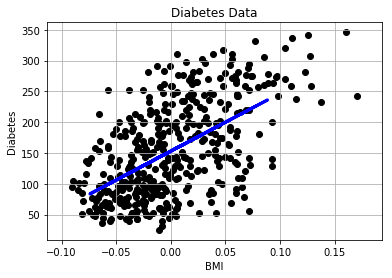

In [11]:
plt.figure()
plt.title('Diabetes Data')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.scatter(diabetes_X_train, diabetes_y_train, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.grid(True)
plt.show()